In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
image_path = "download.jpeg"
img = cv2.imread(image_path)

if img is None:
    print("Image not found or failed to load.")

In [22]:
# Load the image
image_path = "download.jpeg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying with Matplotlib

In [24]:
# Step 1: Pixelate the image
def pixelate(image, pixel_size=10):
    # Resize down
    small = cv2.resize(image, (image.shape[1] // pixel_size, image.shape[0] // pixel_size), interpolation=cv2.INTER_LINEAR)
    # Resize up to original size
    pixelated_image = cv2.resize(small, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
    return pixelated_image

pixelated_image = pixelate(image)

# Step 2: Add Noise (TV Static Effect)
def add_noise(image, amount=0.1):
    noisy_image = image.copy()
    num_salt = int(amount * image.size)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 255  # Salt (white noise)
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[coords[0], coords[1], :] = 0  # Pepper (black noise)
    return noisy_image

noisy_image = add_noise(pixelated_image)

# Step 3: Add Scan Lines
def add_scan_lines(image, line_spacing=5):
    scan_line_image = image.copy()
    for y in range(0, image.shape[0], line_spacing * 2):
        scan_line_image[y:y + line_spacing] = scan_line_image[y:y + line_spacing] // 2  # Darken lines
    return scan_line_image

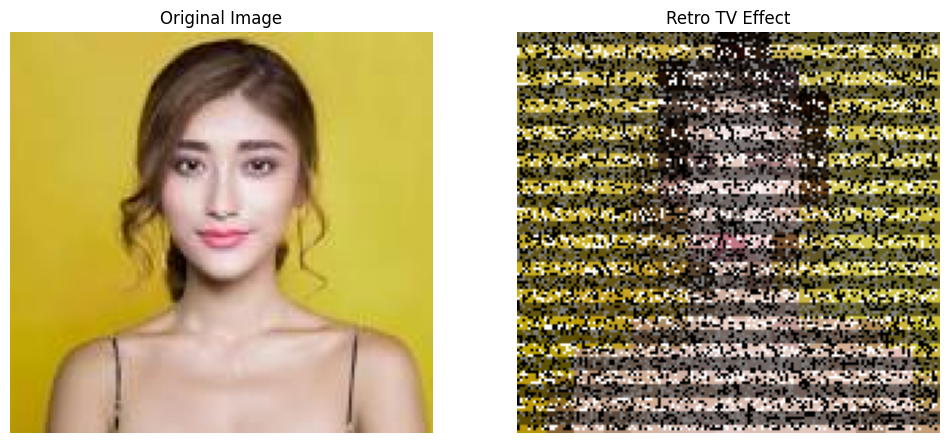

In [25]:
retro_image = add_scan_lines(noisy_image)

# Displaying the Original and Retro Effect Image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(retro_image)
ax[1].set_title("Retro TV Effect")
ax[1].axis("off")
plt.show()
